<a href="https://colab.research.google.com/github/juansvas/testing_repo/blob/master/Histograms_with_Numpy%2C_Matplotlib%2C_Pandas_%26_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tutorial: https://realpython.com/lessons/python-histogram-plotting-numpy-matplotlib-pandas-seaborn-conclusion/
# Completion: https://realpython.com/certificates/7093b05d-5320-40d6-8c19-8ebdc51ec43f/

# Histograms with numpy
import numpy as np

# Set seed
np.random.seed(444)

# Set 3 decimal points
np.set_printoptions(precision=3)

# Create laplace distribution with 500 data points
d = np.random.laplace(loc=15, scale=3, size=500)

# Print first 5 values
print(d[:5])

[18.406 18.087 16.004 16.221  7.358]


In [3]:
# Create historgram using d variable
hist, bin_edges = np.histogram(d)

print(hist)
print()
print(bin_edges)

[ 13  23  91 261  80  21   7   2   1   1]

[ 2.11   5.874  9.638 13.402 17.166 20.93  24.694 28.458 32.222 35.986
 39.749]


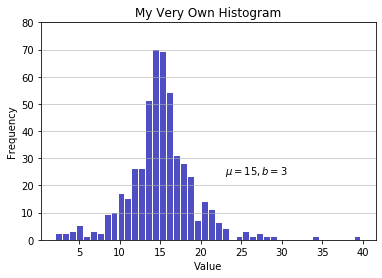

In [6]:
# Histograms with matplotlib
import matplotlib.pyplot as plt

# Create histogram -- x for dataset, alpha for transparency,
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 24, r'$\mu=15, b=3$')
maxfreq = n.max()
plt.ylim(top=np.ceil(maxfreq/10)*10 if maxfreq % 10 else maxfreq + 10)
plt.show()

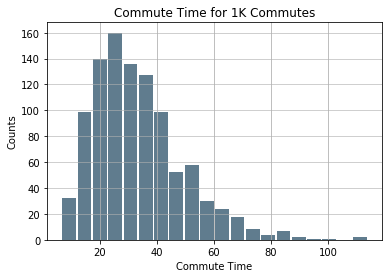

In [9]:
# Histograms with pandas
import pandas as pd

# Set size and scale variables
size, scale = 1000, 10

# Create pandas Series
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

# Create histogram
commutes.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.title('Commute Time for 1K Commutes')
plt.xlabel('Commute Time')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [10]:
# Kernel Density Estimates (KDEs)

means = 10, 20
stdevs = 4, 2

dist = pd.DataFrame(np.random.normal(loc=means, scale=stdevs, size=(1000,2)), columns=['a', 'b'])

print(dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2))

          a      b
min   -3.78  12.55
max   23.28  26.54
mean   9.99  19.99
std    4.03   2.01


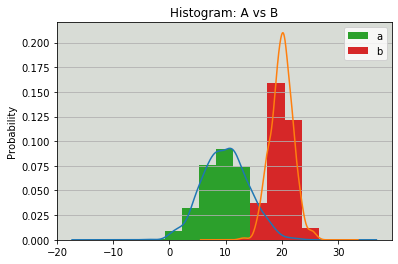

In [11]:
# Create subplot view using data above
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: A vs B')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')
plt.show()

<function matplotlib.pyplot.show>

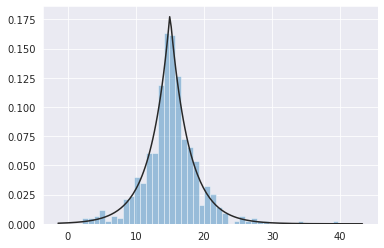

In [14]:
# Histograms with Seaborn -- use d variable
import seaborn as sns

# Set Seaborn stye to darkgrid
sns.set_style('darkgrid')

# Add KDE then fit curve to laplace distribution
sns.distplot(d, fit=stats.laplace, kde=False)

# Seaborn is a matplotlib wrapper
plt.show

In [16]:
# Pandas tools
# Create dataset with 10,000 values
data = np.random.choice(np.arange(10), size=10000, p=np.linspace(1, 11, 10) / 60)

# Turn dataset into pandas Series
s = pd.Series(data)

# Check how counts of values
print(s.value_counts())

9    1809
8    1676
7    1456
6    1302
5    1098
4     898
3     714
2     535
1     336
0     176
dtype: int64


In [17]:
# Normalize the data - put on scale of 0-1
print(s.value_counts(normalize=True))

9    0.1809
8    0.1676
7    0.1456
6    0.1302
5    0.1098
4    0.0898
3    0.0714
2    0.0535
1    0.0336
0    0.0176
dtype: float64


In [18]:
# Using Cut
ages = pd.Series([1, 1, 3, 5, 8, 10, 12, 15, 18, 18, 19, 20, 25, 30, 40, 51, 52])

# 7 bins and 6 labels
bins = [0, 10, 13, 18, 21, np.inf]
labels = ['child', 'preteen', 'teen', 'military_ age', 'adult']

# Cut assigns ages to the bin they belong to
groups = pd.cut(ages, bins=bins, labels=labels)
print(groups.value_counts())

child            6
adult            5
teen             3
military_ age    2
preteen          1
dtype: int64
